# Identify the level of income qualification needed for the families in Latin America.

By Elizabeth Ramos
Last Updated: 08/16/2021

1. Identification of the Business Problem: Identify the level of income qualification needed for the families in Latin America
2. Identification of the Data: lets load the necessary libraries 

In [11]:
# For Data Manipulation
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

The data needs to be in good shape. Lets load the data into a data frame to start analyzing it.


In [4]:
train_df = pd.read_csv("train.csv")
test_df =  pd.read_csv("test.csv")

Lets explore the train dataset using the head() function to see the 5 first rows of the dataset

In [5]:
train_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


Lets display the info of the train data frame

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


Now, lets explore the Test Data Frame--> test_df

In [8]:
test_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


Comparing the two data sets, we have:
	
            Train Data Set                    ----	  Test Data Set
Rows	      9557	                                   23856
Columns	      143	                                   142
Data Types    float64 -8, int64-130, object-5	       float64-8, int64-129, object-5

So, we clearly see that in our Test Data Set there are 129 integer columns, 8 float (numeric) columns, and 5 object columns. 

The test data has many more rows (23856 compared to 9557 in the Train data set)

There is no Target --It does have one fewer column. So, lets take a look of the columns datatypes:

In [17]:
print('Integer Type: ')
print(train_df.select_dtypes(np.int64).columns)
print('\n')
print('Float Type: ')
print(train_df.select_dtypes(np.float64).columns)
print('\n')
print('Object Type: ')
print(train_df.select_dtypes(np.object).columns)

Integer Type: 
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)


Float Type: 
Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')


Object Type: 
Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


- Lets explore int64 data types

In [14]:
train_df.select_dtypes('int64').head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,1,0,43,100,1849,1,100,0,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,1,0,67,144,4489,1,144,0,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,1,0,92,121,8464,1,0,0,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,1,0,17,81,289,16,121,4,289,4
4,0,5,0,1,1,1,0,2,2,1,...,1,0,37,121,1369,16,121,4,1369,4


Lets find the column with null values for the int64 type

In [19]:
null_values=train_df.select_dtypes('int64').isnull().sum()
null_values[null_values > 0]

Series([], dtype: int64)

We found No null values

- Lets explore the float data types

In [20]:
train_df.select_dtypes('float64').head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0


Find the columns with null values for the float types

In [21]:
null_values=train_df.select_dtypes('float64').isnull().sum()
null_values[null_values > 0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

- We clearly see the number of null values for the variables: 

v2a1: monthly rent payment

v18q1: number of tablets household owns

rez_esc: Years behind in school

meaneduc: average years of education for adults (18+)

SQBmeaned: square of the mean years of education of adults (>=18) in the household 142


- Now, lets explore the object data types

In [23]:
train_df.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


We found that object type features dependency, edjefe, edjefa have mixed values

- Lets find null values

In [24]:
null_values=train_df.select_dtypes('object').isnull().sum()
null_values[null_values > 0]

Series([], dtype: int64)

No null values found

- Lets see the total number of nulls in both data sets

In [28]:
print("Number of nulls in train data set are {}".format(train_df.isnull().sum().sum()))

Number of nulls in train data set are 22140


In [29]:
print("Number of nulls in test data set are {}".format(test_df.isnull().sum().sum()))

Number of nulls in test data set are 55244


# Cleaning Data

## a) Filling Columns with Null Values:

Filling Null Values for:

- Variable: v2a1
- Description: monthly rent payment

The variable v2a1 is related to:

 tipovivi1 =1 own and fully paid house
 
 tipovivi2 =1 own,  paying in installments
 
 tipovivi3 =1 rented
 
 tipovivi4 =1 precarious 

 tipovivi5 =1 other(assigned,  borrowed)

v2a1 is NA if tipovivi2 or tipovivi3 is 0 tipovivi2 (a true false statement if an individual owns the house and is paying installment). tipovivi3 (a true false statement if an individual is renting the house). We will assume 0 for NA in v2a1

In [30]:
data_train = train_df[train_df['v2a1'].isnull()].head()

columns=['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
data_train[columns]

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,1,0,0,0,0
13,1,0,0,0,0
14,1,0,0,0,0
26,1,0,0,0,0
32,1,0,0,0,0


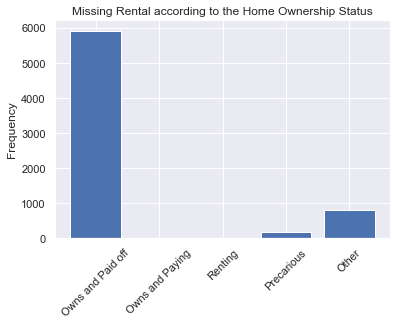

In [31]:
#Type of ownership --> variable type_own

type_own = [x for x in train_df if x.startswith('tipo')]

#Lets plot the data related to the variable v2a1: monthly rent payment

rent_status=train_df.loc[train_df['v2a1'].isnull(), type_own].sum()

plt.bar(type_own,rent_status,align='center')
plt.xticks([0,1,2,3,4],['Owns and Paid off','Owns and Paying', 'Renting','Precarious','Other'],rotation = 45),
plt.ylabel('Frequency')
plt.title("Missing Rental according to the Home Ownership Status")
plt.show()

Analysis: Owns and Paid Off -> no rental payment, it makes sense. So, lets add 0 for the all null values

In [32]:
for df in [train_df, test_df]:
    df['v2a1'].fillna(value=0, inplace=True)

train_df[['v2a1']].isnull().sum()

v2a1    0
dtype: int64

Filling Null Values for:

- Variable: v18q1
- Description: number of tablets household owns
- Total nulls: 7342
- Columns related to v18q1 --> v18q owns a tablet

This is a household variable, it only makes sense to look at it on a household level, 
so we'll only select the rows for the head of household.

In [33]:
heads = train_df.loc[train_df['parentesco1'] == 1].copy()
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())


v18q
0    2318
1       0
Name: v18q1, dtype: int64

- Lets plot the data

Analysis:  when owns a tablet column is 0, there will be no number of tablets household owns.

Lets add 0 for all the null values.

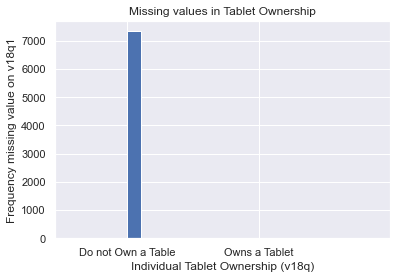

In [51]:
Owns_tablet = train_df.loc[train_df['v18q1'].isnull(), 'v18q']
plt.hist(x = Owns_tablet)
plt.xticks([0,1,2],['Do not Own a Table','Owns a Tablet','']),
plt.ylabel('Frequency missing value on v18q1')
plt.xlabel('Individual Tablet Ownership (v18q)')
plt.title('Missing values in Tablet Ownership')
plt.show()

In [52]:
#Lets add 0 for all the null values.
for df in [train_df, test_df]:
    df['v18q1'].fillna(value=0, inplace=True)

train_df[['v18q1']].isnull().sum()

v18q1    0
dtype: int64

Filling Null Values for:

- Variable: rez_esc
- Description: Years behind in school
- Total nulls: 7928
- Columns related to rez_esc --> Age in years: age

In [53]:
# Lets look at the data with not null values first.
train_df[train_df['rez_esc'].notnull()]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [54]:
#From the above , we see that when min age is 7 and max age is 17 for Years, then the 'behind in school' column has a value.
#Lets confirm
train_df.loc[train_df['rez_esc'].isnull()]['age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [55]:
train_df.loc[(train_df['rez_esc'].isnull() & ((train_df['age'] > 7) & (train_df['age'] < 17)))]['age'].describe()
#There is one value that has Null for the 'behind in school' column with age between 7 and 17 

count     1.0
mean     10.0
std       NaN
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: age, dtype: float64

In [56]:
train_df[(train_df['age'] ==10) & train_df['rez_esc'].isnull()].head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2514,ID_f012e4242,160000.0,0,6,0,1,1,1,1.0,0,...,0,100,9,121,1,2.25,0.25,182.25,100,4


Analysis: There is only one member in household for the member with age 10 and who is 'behind in school'.

This explains why the member is behind in school.

The variable=rez_esc(years behind in school) column has null values 

In [59]:
# Lets use the above to fix the data
for df in [train_df, test_df]:
    df['rez_esc'].fillna(value=0, inplace=True)
train_df[['rez_esc']].isnull().sum()

rez_esc    0
dtype: int64

Filling Null Values for:

- Variable: meaneduc
- Description:  average years of education for adults (18+)
- Total nulls: 5
- Columns related to  meaneduc:
  edjefe, years of education of male head of household, based on the interaction of escolari (years of education),
  head of household and gender, yes=1 and no=0
  edjefa, years of education of female head of household, based on the interaction of escolari (years of education), 
  head of household and gender, yes=1 and no=0 
  instlevel1, =1 no level of education
  instlevel2, =1 incomplete primary 

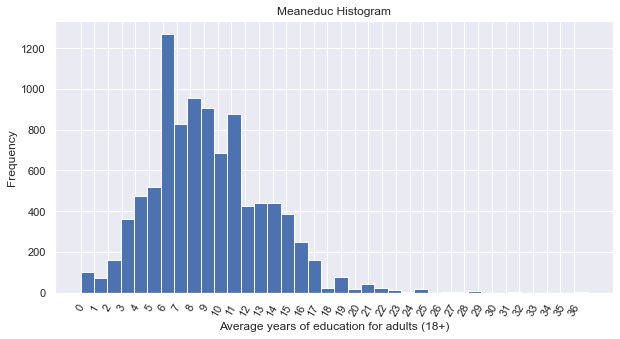

In [68]:
#lets make a histogram for meaneduc
plt.figure(figsize=(10,5))
plt.hist(x=train_df['meaneduc'],bins=int(train_df['meaneduc'].max())+1)
plt.xticks(np.arange(min(train_df['meaneduc']), max(train_df['meaneduc'])),rotation=60),
plt.ylabel('Frequency')
plt.xlabel('Average years of education for adults (18+)')
plt.title('Meaneduc Histogram')
plt.show()

In [69]:
train_df.loc[:,"meaneduc"].mode()

0    6.0
dtype: float64

The mode for train_df --> variable meaneduc is 6 replace NA with 6

In [70]:
train_df.loc[train_df.loc[:,"meaneduc"].isnull()==True,"meaneduc"] = 6

In [71]:
test_df.loc[:,"meaneduc"].mode()

0    6.0
dtype: float64

The mode for test_df --> variable meaneduc is 6 replace NA with 6

In [72]:
test_df.loc[test_df.loc[:,"meaneduc"].isnull()==True,"meaneduc"] = 6

Lets check for nulls now

In [73]:
train_df[['meaneduc']].isnull().sum()

meaneduc    0
dtype: int64

In [74]:
test_df[['meaneduc']].isnull().sum()

meaneduc    0
dtype: int64

Filling Null Values for:

- Variable: SQBmeaned
- Description: square of the mean years of education of adults (>=18) in the household 142
- Total nulls: 5
- Since this variable is the square of the mean of meaneduc, lets replace it with squared of mode of meaneduc (mode = 36)

In [75]:
train_df.loc[train_df.loc[:,"SQBmeaned"].isnull()==True,"SQBmeaned"] = 36

In [76]:
test_df.loc[test_df.loc[:,"SQBmeaned"].isnull()==True,"SQBmeaned"] = 36

Checking for missing values again:

In [77]:
train_df[['SQBmeaned']].isnull().sum()

SQBmeaned    0
dtype: int64

In [78]:
test_df[['SQBmeaned']].isnull().sum()

SQBmeaned    0
dtype: int64

Check for null values in the all data set

In [79]:
null_values = train_df.isnull().sum()
null_values[null_values > 0].sort_values(ascending=False)

Series([], dtype: int64)

## b) Fix the mixing values

In [111]:
mapping={'yes':1,'no':0}

for m in [train_df, test_df]:
    m['dependency'] =m['dependency'].replace(mapping).astype(np.float64)
    m['edjefe'] = m['edjefe'].replace(mapping).astype(np.float64)
    m['edjefa'] = m['edjefa'].replace(mapping).astype(np.float64)
    
train_df[['dependency','edjefe','edjefa']].describe()

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.000000
mean,1.149550,5.096788,2.896830
std,1.605993,5.246513,4.612056
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


# Check for Data Inconsistency

Lets see if records belonging to the same household has the same poverty target.

In [82]:
dif_target=(train_df.groupby('idhogar')['Target'].nunique()>1)
households = train_df["idhogar"].unique().shape[0]
print('There are',dif_target.sum(),'households that do not have the same target, out of', 
      households, 'households in the train dataset.')

There are 85 households that do not have the same target, out of 2988 households in the train dataset.


In [85]:
#Lets check:

not_equal = (train_df.groupby('idhogar')['Target'].transform('nunique')>1)
dif_target= train_df.loc[not_equal,'idhogar'].unique()

#household with not the same target
train_df.loc[train_df['idhogar'].isin(dif_target),['idhogar','parentesco1','Target']].head()

,idhogar,parentesco1,Target
282,4b6077882,1,1
283,4b6077882,0,2
284,4b6077882,0,2
285,6833ac5dc,0,2
286,6833ac5dc,0,2


In [91]:
#Lets use Target value of the parent record (head of the household) and update rest. But before that lets check
# if all families has a head. 

house_head = train_df.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
house_no_head = train_df.loc[train_df['idhogar'].isin(house_head[house_head == 0].index), :]

print('There are {} households without a head.'.format(house_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [92]:
# Find households without a head and where Target value are different
h_no_head = house_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different Target value.'.format(sum(h_no_head == False)))

0 Households with no head have different Target value.


In [99]:
# Fixing the data

for t in dif_target:
    Targets= (train_df.loc[train_df['idhogar']== t,'Target'])

    if Targets.mode().shape[0] >1:
        for i in Targets.index:
            if train_df.loc[i,'parentesco1']==1:
                HeadTarget= train_df.loc[i,"Target"]    
        for i in Targets.index:
            train_df.loc[i,'Target']=HeadTarget
    elif Targets.mode().shape[0]==1:
        for i in Targets.index:
            TrueTarget=int(Targets.mode())
            train_df.loc[i,'Target']=TrueTarget

In [103]:
no_discrepancy=(train_df.groupby('idhogar')['Target'].nunique()>1)

print('There are ',no_discrepancy.sum(),'households with contradicting targets, out of 2988 households in the train dataset')

train_df.head()
train_df.shape

There are  0 households with contradicting targets, out of 2988 households in the train dataset


(9557, 143)

# Check if there are any biases in the dataset.

Lets look at the dataset --> head of household and Target

1 = extreme poverty 

2 = moderate poverty 

3 = vulnerable households 

4 = non vulnerable households

In [104]:
target_c = heads['Target'].value_counts().sort_index()
target_c

1     222
2     442
3     355
4    1954
Name: Target, dtype: int64

We clearly see that non vulnerable households has the most count, lets plot  the data

<AxesSubplot:title={'center':'Target vs Total_Count'}>

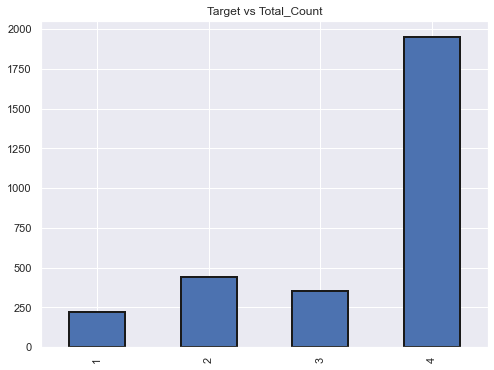

In [106]:
target_c.plot.bar(figsize = (8, 6),linewidth = 2,edgecolor = 'k',title="Target vs Total_Count")

Bias Analysis: extreme poverty (1) is the smallest count in the train dataset with 222 count.

The dataset is biased.

The folowing variables are the squared of other attributes:
- SQBescolari
- SQBage
- SQBHogar_ttal
- SQBedjefe
- SQBhogar_nin
- SQBovercrowding
- SQBdependency
- SQBMeaned
- agesq

 We do not need those in our model, lets remove them.

In [108]:
train_df=train_df.drop(columns=train_df.columns[133:142],axis=1)
test_df=test_df.drop(columns=test_df.columns[133:142],axis=1)

In [109]:
print(train_df.shape)
print(test_df.shape)

(9557, 134)
(23856, 133)


In [110]:
id_ = ['Id', 'idhogar', 'Target']

ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']

ind_ordered = ['rez_esc', 'escolari', 'age']

hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

# Set poverty level of the members and the head of the house within a family.

There are several variables that can set the poverty level.

Lets focus on the ones who are paying paying less rent or  don't own a house.

Location: urban area or rural area.

Variable: v2a1
Description: Monthly rent payment

In [120]:
poverty_level=train_df[train_df['v2a1'] !=0]

In [121]:
poverty_level.shape

(2668, 134)

Variable: 

area1 = 1 zona urbana

area2 = 2 zona rural

In [122]:
poverty_level = poverty_level.groupby('area1')['v2a1'].apply(np.median)

In [123]:
poverty_level

area1
0     80000.0
1    140000.0
Name: v2a1, dtype: float64

For rural area level if people paying rent less than 8000 is under poverty level.

For Urban area level if people paying rent less than 140000 is under poverty level.

## Define Variable Categories
There are several different categories of variables:

Individual Variables: these are characteristics of each individual rather than the household
Boolean: Yes or No (0 or 1)
Ordered Discrete: Integers with an ordering
Household variables
Boolean: Yes or No
Ordered Discrete: Integers with an ordering
Continuous numeric
Squared Variables: derived from squaring variables in the data
Id variables: identifies the data and should not be used as features
Below we manually define the variables in each category.

In [138]:
id_ = ['Id', 'idhogar', 'Target']

ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']

ind_ordered = ['rez_esc', 'escolari', 'age']

hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [139]:
#redundant household variables
heads = df_income_train.loc[df_income_train['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(2973, 98)

Lets check the highly correlated household and individual variables

If there are any correlation we may want to remove the ones highly correlated

In [140]:
# Create correlation matrix

corr_matrix = heads.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [141]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.996884,0.929237,0.996884,0.996884
tamhog,0.996884,1.000000,0.926667,1.000000,1.000000
tamviv,0.929237,0.926667,1.000000,0.926667,0.926667
hhsize,0.996884,1.000000,0.926667,1.000000,1.000000
hogar_total,0.996884,1.000000,0.926667,1.000000,1.000000


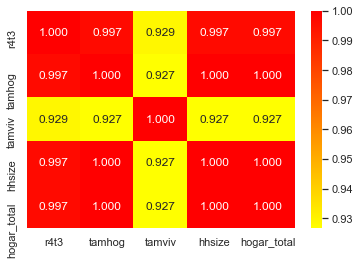

In [151]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, 
                            corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.autumn_r, fmt='.3f');

Analysis: We can see that the hhsize:  household size is highly correlated with tamhog: size of the household

r4t3: Total persons in the household and hogar_total:# of total individuals in the household

Therefore, we keep hhsize and remove the other variables

In [143]:
cols=['tamhog', 'hogar_total', 'r4t3']
for df in [train_df, test_df]:
    df.drop(columns = cols,inplace=True)

train_df.shape

(9557, 131)

In [144]:
#Check for redundant Individual variables
ind_var = train_df[id_ + ind_bool + ind_ordered]
ind_var.shape

(9557, 39)

In [145]:
# Create correlation matrix
c_matrix = ind_var.corr()

# Select upper triangle of correlation matrix
upper = c_matrix.where(np.triu(np.ones(c_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

Redundant column is area2. This means the house is in a rural zone, 
but it's redundant because we have a column indicating if the house is in a urban zone. 

Therefore, we can drop this column.

In [152]:
for df in [train_df, test_df]:
    df.drop(columns = 'area2',inplace=True)

train_df.shape

(9557, 129)

In [153]:
heads.groupby('area1')['Target'].value_counts(normalize = True)

area1  Target
0      4         0.582249
       2         0.176331
       3         0.147929
       1         0.093491
1      4         0.687030
       2         0.137688
       3         0.108083
       1         0.067199
Name: Target, dtype: float64

It seems like households in an urban area (value of 1) are more likely to have lower poverty levels than households in a rural area (value of 0).

In [154]:
# lets delete 'Id', 'idhogar'
cols=['Id','idhogar']
for df in [train_df, test_df]:
    df.drop(columns = cols,inplace=True)

train_df.shape

(9557, 127)

# Predict the accuracy using random forest classifier.


In [158]:
x_features = train_df.iloc[:,0:-1]
y_features= train_df.iloc[:,-1]
print(x_features.shape)
print(y_features.shape)

(9557, 126)
(9557,)


In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

x_train,x_test,y_train,y_test=train_test_split(x_features,y_features,test_size=0.2,random_state=1)
rmclassifier = RandomForestClassifier()

In [160]:
rmclassifier.fit(x_train,y_train)

RandomForestClassifier()

In [161]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(n_estimators=10)

In [162]:
y_predict = rmclassifier.predict(x_test)

In [176]:
print(accuracy_score(y_test,y_predict)*100)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

94.61297071129707
[[ 119    0    0   24]
 [   0  295    2   34]
 [   0    1  191   41]
 [   0    0    1 1204]]
              precision    recall  f1-score   support

           1       1.00      0.83      0.91       143
           2       1.00      0.89      0.94       331
           3       0.98      0.82      0.89       233
           4       0.92      1.00      0.96      1205

    accuracy                           0.95      1912
   macro avg       0.98      0.89      0.93      1912
weighted avg       0.95      0.95      0.94      1912



In [165]:
y_predict_testdata = rmclassifier.predict(test_df)

In [166]:
y_predict_testdata

array([4, 4, 4, ..., 2, 4, 4], dtype=int64)

## Check the accuracy using random forest with cross validation.

In [167]:
from sklearn.model_selection import KFold,cross_val_score

- Checking the score using default 10 trees

In [169]:
seed=7
kfold=KFold(n_splits=5,random_state=seed,shuffle=True)

rmclassifier=RandomForestClassifier(random_state=10,n_jobs = -1)

print(cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy'))
results=cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy')

print(results.mean()*100)

[0.94299163 0.95031381 0.94400837 0.94034537 0.95185767]
94.59033693941045


- Checking the score using 100 trees

In [175]:
num_trees= 100

rmclassifier=RandomForestClassifier(n_estimators=100, random_state=10,n_jobs = -1)

print(cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy'))

results=cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy')
print('Accuracy of Score:', results.mean()*100)

[0.94299163 0.95031381 0.94400837 0.94034537 0.95185767]
Accuracy of Score: 94.59033693941045
